In [1]:
%cd ../

/home/zulqarnain/develop/htfatorch


In [2]:
import logging
import numpy as np
import htfa_torch.htfa as HTFA
import htfa_torch.niidb as niidb
import htfa_torch.utils as utils

/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [3]:
%matplotlib inline

In [4]:
logging.basicConfig(format='%(asctime)s %(message)s', datefmt='%m/%d/%Y %H:%M:%S',
                    level=logging.INFO)

In [5]:
haxby_db = niidb.FMriActivationsDb('data/haxby_mc_zrest.db')

In [6]:
htfa = HTFA.HierarchicalTopographicFactorAnalysis([b for b in haxby_db.all() if 'rest' not in b.task], mask='/home/zulqarnain/fmri_data/Haxby_Final/mask/haxby_mask.nii.gz', num_factors=100)

01/24/2020 22:33:53 Loading Nifti image /home/zulqarnain/fmri_data/Haxby_Final/sub1_run01_mc_MNI_masked.nii.gz with mask /home/zulqarnain/fmri_data/Haxby_Final/mask/haxby_mask.nii.gz (zscore=True, smooth=6, zscore_by_rest=True)
01/24/2020 22:33:55 Loading Nifti image /home/zulqarnain/fmri_data/Haxby_Final/sub1_run02_mc_MNI_masked.nii.gz with mask /home/zulqarnain/fmri_data/Haxby_Final/mask/haxby_mask.nii.gz (zscore=True, smooth=6, zscore_by_rest=True)
01/24/2020 22:33:56 Loading Nifti image /home/zulqarnain/fmri_data/Haxby_Final/sub1_run03_mc_MNI_masked.nii.gz with mask /home/zulqarnain/fmri_data/Haxby_Final/mask/haxby_mask.nii.gz (zscore=True, smooth=6, zscore_by_rest=True)
01/24/2020 22:33:56 Loading Nifti image /home/zulqarnain/fmri_data/Haxby_Final/sub1_run04_mc_MNI_masked.nii.gz with mask /home/zulqarnain/fmri_data/Haxby_Final/mask/haxby_mask.nii.gz (zscore=True, smooth=6, zscore_by_rest=True)
01/24/2020 22:33:57 Loading Nifti image /home/zulqarnain/fmri_data/Haxby_Final/sub1_run0

01/24/2020 22:34:22 Loading Nifti image /home/zulqarnain/fmri_data/Haxby_Final/sub4_run02_mc_MNI_masked.nii.gz with mask /home/zulqarnain/fmri_data/Haxby_Final/mask/haxby_mask.nii.gz (zscore=True, smooth=6, zscore_by_rest=True)
01/24/2020 22:34:23 Loading Nifti image /home/zulqarnain/fmri_data/Haxby_Final/sub4_run03_mc_MNI_masked.nii.gz with mask /home/zulqarnain/fmri_data/Haxby_Final/mask/haxby_mask.nii.gz (zscore=True, smooth=6, zscore_by_rest=True)
01/24/2020 22:34:24 Loading Nifti image /home/zulqarnain/fmri_data/Haxby_Final/sub4_run04_mc_MNI_masked.nii.gz with mask /home/zulqarnain/fmri_data/Haxby_Final/mask/haxby_mask.nii.gz (zscore=True, smooth=6, zscore_by_rest=True)
01/24/2020 22:34:25 Loading Nifti image /home/zulqarnain/fmri_data/Haxby_Final/sub4_run05_mc_MNI_masked.nii.gz with mask /home/zulqarnain/fmri_data/Haxby_Final/mask/haxby_mask.nii.gz (zscore=True, smooth=6, zscore_by_rest=True)
01/24/2020 22:34:25 Loading Nifti image /home/zulqarnain/fmri_data/Haxby_Final/sub4_run0

In [7]:
losses = htfa.train(num_steps=1500, learning_rate=1e-2, log_level=logging.INFO, num_particles=1,
                    batch_size=50, use_cuda=True, checkpoint_steps=50, blocks_batch_size=12,
                    blocks_filter=haxby_db.inference_filter(training=True))

01/24/2020 22:35:11 [Epoch 1] (5177ms) Posterior free-energy 4.01451616e+08
01/24/2020 22:35:11 Saving checkpoint...
01/24/2020 22:35:15 [Epoch 2] (4651ms) Posterior free-energy 3.84161120e+08
01/24/2020 22:35:20 [Epoch 3] (4626ms) Posterior free-energy 3.74717440e+08
01/24/2020 22:35:25 [Epoch 4] (4635ms) Posterior free-energy 3.65790944e+08
01/24/2020 22:35:29 [Epoch 5] (4653ms) Posterior free-energy 3.50572064e+08
01/24/2020 22:35:34 [Epoch 6] (4638ms) Posterior free-energy 3.42784928e+08
01/24/2020 22:35:38 [Epoch 7] (4647ms) Posterior free-energy 3.32611008e+08
01/24/2020 22:35:43 [Epoch 8] (4673ms) Posterior free-energy 3.23885440e+08
01/24/2020 22:35:48 [Epoch 9] (4646ms) Posterior free-energy 3.17612384e+08
01/24/2020 22:35:52 [Epoch 10] (4657ms) Posterior free-energy 3.13327648e+08
01/24/2020 22:35:57 [Epoch 11] (4643ms) Posterior free-energy 3.07947392e+08
01/24/2020 22:36:02 [Epoch 12] (4654ms) Posterior free-energy 3.01439872e+08
01/24/2020 22:36:06 [Epoch 13] (4660ms) Post

01/24/2020 22:43:31 [Epoch 106] (4763ms) Posterior free-energy 2.36357664e+08
01/24/2020 22:43:36 [Epoch 107] (4754ms) Posterior free-energy 2.35725552e+08
01/24/2020 22:43:41 [Epoch 108] (4771ms) Posterior free-energy 2.35780672e+08
01/24/2020 22:43:45 [Epoch 109] (4751ms) Posterior free-energy 2.35594112e+08
01/24/2020 22:43:50 [Epoch 110] (4750ms) Posterior free-energy 2.35364432e+08
01/24/2020 22:43:55 [Epoch 111] (4759ms) Posterior free-energy 2.35030576e+08
01/24/2020 22:44:00 [Epoch 112] (4752ms) Posterior free-energy 2.34986192e+08
01/24/2020 22:44:04 [Epoch 113] (4765ms) Posterior free-energy 2.35185152e+08
01/24/2020 22:44:09 [Epoch 114] (4753ms) Posterior free-energy 2.34954320e+08
01/24/2020 22:44:14 [Epoch 115] (4756ms) Posterior free-energy 2.34578880e+08
01/24/2020 22:44:19 [Epoch 116] (4761ms) Posterior free-energy 2.34322864e+08
01/24/2020 22:44:23 [Epoch 117] (4755ms) Posterior free-energy 2.34227648e+08
01/24/2020 22:44:28 [Epoch 118] (4755ms) Posterior free-energy 2

01/24/2020 22:51:50 [Epoch 210] (4861ms) Posterior free-energy 2.24037344e+08
01/24/2020 22:51:54 [Epoch 211] (4697ms) Posterior free-energy 2.24098912e+08
01/24/2020 22:51:59 [Epoch 212] (4688ms) Posterior free-energy 2.24065552e+08
01/24/2020 22:52:04 [Epoch 213] (4682ms) Posterior free-energy 2.23842080e+08
01/24/2020 22:52:08 [Epoch 214] (4680ms) Posterior free-energy 2.23911088e+08
01/24/2020 22:52:13 [Epoch 215] (4682ms) Posterior free-energy 2.23812096e+08
01/24/2020 22:52:18 [Epoch 216] (4676ms) Posterior free-energy 2.23682144e+08
01/24/2020 22:52:22 [Epoch 217] (4660ms) Posterior free-energy 2.23580880e+08
01/24/2020 22:52:27 [Epoch 218] (4672ms) Posterior free-energy 2.23717088e+08
01/24/2020 22:52:32 [Epoch 219] (4662ms) Posterior free-energy 2.23624288e+08
01/24/2020 22:52:36 [Epoch 220] (4682ms) Posterior free-energy 2.23334208e+08
01/24/2020 22:52:41 [Epoch 221] (4678ms) Posterior free-energy 2.23204240e+08
01/24/2020 22:52:46 [Epoch 222] (4685ms) Posterior free-energy 2

01/24/2020 23:00:04 [Epoch 314] (4692ms) Posterior free-energy 2.18403696e+08
01/24/2020 23:00:09 [Epoch 315] (4696ms) Posterior free-energy 2.18344880e+08
01/24/2020 23:00:14 [Epoch 316] (4704ms) Posterior free-energy 2.18240976e+08
01/24/2020 23:00:18 [Epoch 317] (4690ms) Posterior free-energy 2.18372288e+08
01/24/2020 23:00:23 [Epoch 318] (4715ms) Posterior free-energy 2.18217744e+08
01/24/2020 23:00:28 [Epoch 319] (4688ms) Posterior free-energy 2.18205040e+08
01/24/2020 23:00:32 [Epoch 320] (4703ms) Posterior free-energy 2.18055696e+08
01/24/2020 23:00:37 [Epoch 321] (4715ms) Posterior free-energy 2.18129056e+08
01/24/2020 23:00:42 [Epoch 322] (4690ms) Posterior free-energy 2.18074688e+08
01/24/2020 23:00:47 [Epoch 323] (4703ms) Posterior free-energy 2.18027488e+08
01/24/2020 23:00:51 [Epoch 324] (4691ms) Posterior free-energy 2.17931984e+08
01/24/2020 23:00:56 [Epoch 325] (4702ms) Posterior free-energy 2.17989808e+08
01/24/2020 23:01:01 [Epoch 326] (4873ms) Posterior free-energy 2

01/24/2020 23:08:22 [Epoch 418] (4767ms) Posterior free-energy 2.15052144e+08
01/24/2020 23:08:26 [Epoch 419] (4767ms) Posterior free-energy 2.14962624e+08
01/24/2020 23:08:31 [Epoch 420] (4768ms) Posterior free-energy 2.14919440e+08
01/24/2020 23:08:36 [Epoch 421] (4782ms) Posterior free-energy 2.15000096e+08
01/24/2020 23:08:41 [Epoch 422] (4768ms) Posterior free-energy 2.14822496e+08
01/24/2020 23:08:45 [Epoch 423] (4784ms) Posterior free-energy 2.14949072e+08
01/24/2020 23:08:50 [Epoch 424] (4783ms) Posterior free-energy 2.14793568e+08
01/24/2020 23:08:55 [Epoch 425] (4772ms) Posterior free-energy 2.14896240e+08
01/24/2020 23:09:00 [Epoch 426] (4753ms) Posterior free-energy 2.14845376e+08
01/24/2020 23:09:05 [Epoch 427] (4761ms) Posterior free-energy 2.14776752e+08
01/24/2020 23:09:09 [Epoch 428] (4762ms) Posterior free-energy 2.14757008e+08
01/24/2020 23:09:14 [Epoch 429] (4770ms) Posterior free-energy 2.14748416e+08
01/24/2020 23:09:19 [Epoch 430] (4771ms) Posterior free-energy 2

01/24/2020 23:16:41 [Epoch 522] (4880ms) Posterior free-energy 2.12724592e+08
01/24/2020 23:16:46 [Epoch 523] (4892ms) Posterior free-energy 2.12801520e+08
01/24/2020 23:16:51 [Epoch 524] (4883ms) Posterior free-energy 2.12762432e+08
01/24/2020 23:16:56 [Epoch 525] (4895ms) Posterior free-energy 2.12716336e+08
01/24/2020 23:17:01 [Epoch 526] (4860ms) Posterior free-energy 2.12686288e+08
01/24/2020 23:17:05 [Epoch 527] (4808ms) Posterior free-energy 2.12745344e+08
01/24/2020 23:17:10 [Epoch 528] (4793ms) Posterior free-energy 2.12659952e+08
01/24/2020 23:17:15 [Epoch 529] (4799ms) Posterior free-energy 2.12634272e+08
01/24/2020 23:17:20 [Epoch 530] (4793ms) Posterior free-energy 2.12642288e+08
01/24/2020 23:17:25 [Epoch 531] (4804ms) Posterior free-energy 2.12699600e+08
01/24/2020 23:17:29 [Epoch 532] (4791ms) Posterior free-energy 2.12659584e+08
01/24/2020 23:17:34 [Epoch 533] (4798ms) Posterior free-energy 2.12618048e+08
01/24/2020 23:17:39 [Epoch 534] (4792ms) Posterior free-energy 2

01/24/2020 23:25:03 [Epoch 626] (4649ms) Posterior free-energy 2.11156800e+08
01/24/2020 23:25:08 [Epoch 627] (4668ms) Posterior free-energy 2.11177456e+08
01/24/2020 23:25:12 [Epoch 628] (4662ms) Posterior free-energy 2.11201696e+08
01/24/2020 23:25:17 [Epoch 629] (4669ms) Posterior free-energy 2.11161216e+08
01/24/2020 23:25:22 [Epoch 630] (4666ms) Posterior free-energy 2.11154944e+08
01/24/2020 23:25:26 [Epoch 631] (4662ms) Posterior free-energy 2.11113296e+08
01/24/2020 23:25:31 [Epoch 632] (4660ms) Posterior free-energy 2.11107792e+08
01/24/2020 23:25:36 [Epoch 633] (4663ms) Posterior free-energy 2.11067920e+08
01/24/2020 23:25:40 [Epoch 634] (4653ms) Posterior free-energy 2.11145024e+08
01/24/2020 23:25:45 [Epoch 635] (4668ms) Posterior free-energy 2.11062768e+08
01/24/2020 23:25:50 [Epoch 636] (4659ms) Posterior free-energy 2.11099472e+08
01/24/2020 23:25:54 [Epoch 637] (4671ms) Posterior free-energy 2.11040384e+08
01/24/2020 23:25:59 [Epoch 638] (4662ms) Posterior free-energy 2

01/24/2020 23:33:13 [Epoch 730] (4692ms) Posterior free-energy 2.09964736e+08
01/24/2020 23:33:18 [Epoch 731] (4851ms) Posterior free-energy 2.09955248e+08
01/24/2020 23:33:23 [Epoch 732] (4864ms) Posterior free-energy 2.09953280e+08
01/24/2020 23:33:28 [Epoch 733] (4866ms) Posterior free-energy 2.09973984e+08
01/24/2020 23:33:33 [Epoch 734] (4876ms) Posterior free-energy 2.09967408e+08
01/24/2020 23:33:38 [Epoch 735] (4866ms) Posterior free-energy 2.09935536e+08
01/24/2020 23:33:43 [Epoch 736] (4851ms) Posterior free-energy 2.09947344e+08
01/24/2020 23:33:47 [Epoch 737] (4862ms) Posterior free-energy 2.09918912e+08
01/24/2020 23:33:52 [Epoch 738] (4855ms) Posterior free-energy 2.09881664e+08
01/24/2020 23:33:57 [Epoch 739] (4873ms) Posterior free-energy 2.09908624e+08
01/24/2020 23:34:02 [Epoch 740] (4833ms) Posterior free-energy 2.09882128e+08
01/24/2020 23:34:07 [Epoch 741] (4731ms) Posterior free-energy 2.09875472e+08
01/24/2020 23:34:12 [Epoch 742] (4758ms) Posterior free-energy 2

01/24/2020 23:41:32 [Epoch 834] (4698ms) Posterior free-energy 2.09053568e+08
01/24/2020 23:41:37 [Epoch 835] (4719ms) Posterior free-energy 2.09031536e+08
01/24/2020 23:41:42 [Epoch 836] (4687ms) Posterior free-energy 2.09052400e+08
01/24/2020 23:41:46 [Epoch 837] (4708ms) Posterior free-energy 2.08961696e+08
01/24/2020 23:41:51 [Epoch 838] (4719ms) Posterior free-energy 2.08990000e+08
01/24/2020 23:41:56 [Epoch 839] (4694ms) Posterior free-energy 2.08979648e+08
01/24/2020 23:42:00 [Epoch 840] (4711ms) Posterior free-energy 2.08881056e+08
01/24/2020 23:42:05 [Epoch 841] (4695ms) Posterior free-energy 2.09043520e+08
01/24/2020 23:42:10 [Epoch 842] (4701ms) Posterior free-energy 2.08992832e+08
01/24/2020 23:42:15 [Epoch 843] (4762ms) Posterior free-energy 2.08964608e+08
01/24/2020 23:42:19 [Epoch 844] (4759ms) Posterior free-energy 2.08939552e+08
01/24/2020 23:42:24 [Epoch 845] (4778ms) Posterior free-energy 2.08942784e+08
01/24/2020 23:42:29 [Epoch 846] (4770ms) Posterior free-energy 2

01/24/2020 23:49:44 [Epoch 938] (4846ms) Posterior free-energy 2.08261392e+08
01/24/2020 23:49:49 [Epoch 939] (4863ms) Posterior free-energy 2.08258144e+08
01/24/2020 23:49:53 [Epoch 940] (4857ms) Posterior free-energy 2.08258064e+08
01/24/2020 23:49:58 [Epoch 941] (4845ms) Posterior free-energy 2.08264320e+08
01/24/2020 23:50:03 [Epoch 942] (4875ms) Posterior free-energy 2.08237264e+08
01/24/2020 23:50:08 [Epoch 943] (4853ms) Posterior free-energy 2.08279424e+08
01/24/2020 23:50:13 [Epoch 944] (4838ms) Posterior free-energy 2.08230032e+08
01/24/2020 23:50:18 [Epoch 945] (4854ms) Posterior free-energy 2.08215808e+08
01/24/2020 23:50:23 [Epoch 946] (4853ms) Posterior free-energy 2.08192848e+08
01/24/2020 23:50:27 [Epoch 947] (4847ms) Posterior free-energy 2.08228896e+08
01/24/2020 23:50:32 [Epoch 948] (4841ms) Posterior free-energy 2.08184864e+08
01/24/2020 23:50:37 [Epoch 949] (4869ms) Posterior free-energy 2.08183104e+08
01/24/2020 23:50:42 [Epoch 950] (4857ms) Posterior free-energy 2

01/24/2020 23:58:01 [Epoch 1042] (4693ms) Posterior free-energy 2.07898432e+08
01/24/2020 23:58:06 [Epoch 1043] (4715ms) Posterior free-energy 2.07921008e+08
01/24/2020 23:58:11 [Epoch 1044] (4689ms) Posterior free-energy 2.07896784e+08
01/24/2020 23:58:15 [Epoch 1045] (4697ms) Posterior free-energy 2.07899328e+08
01/24/2020 23:58:20 [Epoch 1046] (4702ms) Posterior free-energy 2.07897856e+08
01/24/2020 23:58:25 [Epoch 1047] (4683ms) Posterior free-energy 2.07952208e+08
01/24/2020 23:58:30 [Epoch 1048] (4766ms) Posterior free-energy 2.07937152e+08
01/24/2020 23:58:34 [Epoch 1049] (4888ms) Posterior free-energy 2.07893376e+08
01/24/2020 23:58:39 [Epoch 1050] (4883ms) Posterior free-energy 2.07923472e+08
01/24/2020 23:58:44 [Epoch 1051] (4865ms) Posterior free-energy 2.07899600e+08
01/24/2020 23:58:44 Saving checkpoint...
01/24/2020 23:58:49 [Epoch 1052] (4886ms) Posterior free-energy 2.07930688e+08
01/24/2020 23:58:54 [Epoch 1053] (4890ms) Posterior free-energy 2.07933744e+08
01/24/2020 

01/25/2020 00:06:13 [Epoch 1145] (4690ms) Posterior free-energy 2.07882480e+08
01/25/2020 00:06:18 [Epoch 1146] (4679ms) Posterior free-energy 2.07885360e+08
01/25/2020 00:06:23 [Epoch 1147] (4701ms) Posterior free-energy 2.07875152e+08
01/25/2020 00:06:27 [Epoch 1148] (4687ms) Posterior free-energy 2.07893264e+08
01/25/2020 00:06:32 [Epoch 1149] (4696ms) Posterior free-energy 2.07897856e+08
01/25/2020 00:06:37 [Epoch 1150] (4696ms) Posterior free-energy 2.07848304e+08
01/25/2020 00:06:41 [Epoch 1151] (4693ms) Posterior free-energy 2.07885344e+08
01/25/2020 00:06:41 Saving checkpoint...
01/25/2020 00:06:46 [Epoch 1152] (4686ms) Posterior free-energy 2.07887584e+08
01/25/2020 00:06:51 [Epoch 1153] (4691ms) Posterior free-energy 2.07935280e+08
01/25/2020 00:06:56 [Epoch 1154] (4676ms) Posterior free-energy 2.07909456e+08
01/25/2020 00:07:00 [Epoch 1155] (4702ms) Posterior free-energy 2.07900192e+08
01/25/2020 00:07:05 [Epoch 1156] (4691ms) Posterior free-energy 2.07898256e+08
01/25/2020 

01/25/2020 00:14:24 [Epoch 1248] (4630ms) Posterior free-energy 2.07903296e+08
01/25/2020 00:14:28 [Epoch 1249] (4639ms) Posterior free-energy 2.07889888e+08
01/25/2020 00:14:33 [Epoch 1250] (4622ms) Posterior free-energy 2.07901616e+08
01/25/2020 00:14:37 [Epoch 1251] (4646ms) Posterior free-energy 2.07874496e+08
01/25/2020 00:14:37 Saving checkpoint...
01/25/2020 00:14:42 [Epoch 1252] (4642ms) Posterior free-energy 2.07899120e+08
01/25/2020 00:14:47 [Epoch 1253] (4639ms) Posterior free-energy 2.07834112e+08
01/25/2020 00:14:51 [Epoch 1254] (4638ms) Posterior free-energy 2.07925248e+08
01/25/2020 00:14:56 [Epoch 1255] (4641ms) Posterior free-energy 2.07849520e+08
01/25/2020 00:15:01 [Epoch 1256] (4639ms) Posterior free-energy 2.07889872e+08
01/25/2020 00:15:05 [Epoch 1257] (4635ms) Posterior free-energy 2.07871280e+08
01/25/2020 00:15:10 [Epoch 1258] (4622ms) Posterior free-energy 2.07888208e+08
01/25/2020 00:15:15 [Epoch 1259] (4645ms) Posterior free-energy 2.07891104e+08
01/25/2020 

01/25/2020 00:22:34 [Epoch 1351] (4699ms) Posterior free-energy 2.07877744e+08
01/25/2020 00:22:34 Saving checkpoint...
01/25/2020 00:22:39 [Epoch 1352] (4681ms) Posterior free-energy 2.07868576e+08
01/25/2020 00:22:44 [Epoch 1353] (4690ms) Posterior free-energy 2.07925584e+08
01/25/2020 00:22:48 [Epoch 1354] (4681ms) Posterior free-energy 2.07871280e+08
01/25/2020 00:22:53 [Epoch 1355] (4700ms) Posterior free-energy 2.07866080e+08
01/25/2020 00:22:58 [Epoch 1356] (4695ms) Posterior free-energy 2.07884720e+08
01/25/2020 00:23:02 [Epoch 1357] (4702ms) Posterior free-energy 2.07903856e+08
01/25/2020 00:23:07 [Epoch 1358] (4696ms) Posterior free-energy 2.07851744e+08
01/25/2020 00:23:12 [Epoch 1359] (4696ms) Posterior free-energy 2.07855120e+08
01/25/2020 00:23:16 [Epoch 1360] (4681ms) Posterior free-energy 2.07874656e+08
01/25/2020 00:23:21 [Epoch 1361] (4695ms) Posterior free-energy 2.07883744e+08
01/25/2020 00:23:26 [Epoch 1362] (4680ms) Posterior free-energy 2.07887984e+08
01/25/2020 

01/25/2020 00:30:43 [Epoch 1454] (4698ms) Posterior free-energy 2.07841632e+08
01/25/2020 00:30:47 [Epoch 1455] (4693ms) Posterior free-energy 2.07875376e+08
01/25/2020 00:30:52 [Epoch 1456] (4680ms) Posterior free-energy 2.07917616e+08
01/25/2020 00:30:57 [Epoch 1457] (4693ms) Posterior free-energy 2.07891152e+08
01/25/2020 00:31:01 [Epoch 1458] (4681ms) Posterior free-energy 2.07853520e+08
01/25/2020 00:31:06 [Epoch 1459] (4703ms) Posterior free-energy 2.07917920e+08
01/25/2020 00:31:11 [Epoch 1460] (4691ms) Posterior free-energy 2.07868160e+08
01/25/2020 00:31:15 [Epoch 1461] (4698ms) Posterior free-energy 2.07852640e+08
01/25/2020 00:31:20 [Epoch 1462] (4707ms) Posterior free-energy 2.07899440e+08
01/25/2020 00:31:25 [Epoch 1463] (4694ms) Posterior free-energy 2.07873472e+08
01/25/2020 00:31:30 [Epoch 1464] (4677ms) Posterior free-energy 2.07864624e+08
01/25/2020 00:31:34 [Epoch 1465] (4691ms) Posterior free-energy 2.07860768e+08
01/25/2020 00:31:39 [Epoch 1466] (4678ms) Posterior 

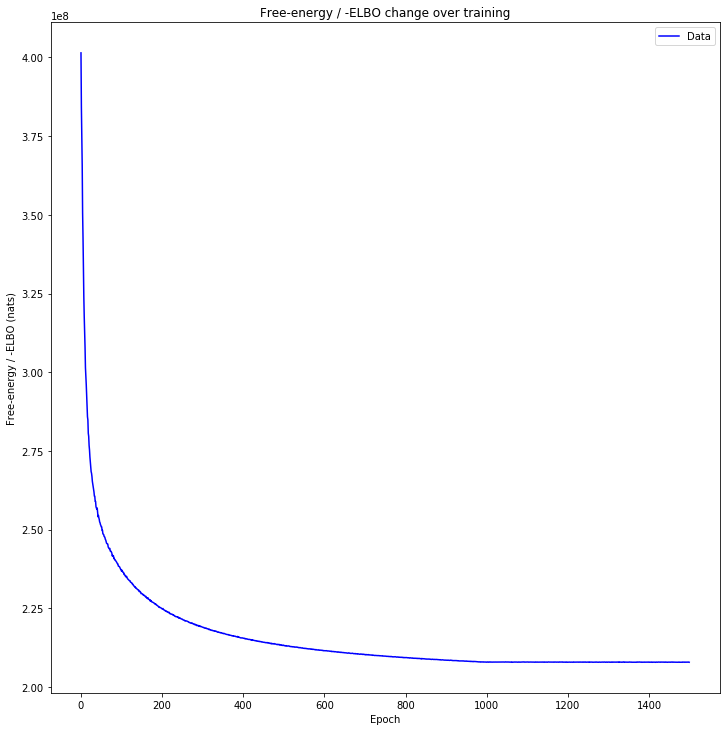

In [8]:
utils.plot_losses(losses)

In [9]:
import re

In [10]:
def subject_labeler(subject):
  
    return 'Participant %d' % (int(subject))

In [11]:
def task_labeler(task):

    return task

In [12]:
def subject_task_labeler(block):
    subject = subject_labeler(block.subject)
    task = task_labeler(block.task)
    return subject + ', ' + task + ' stimulus'

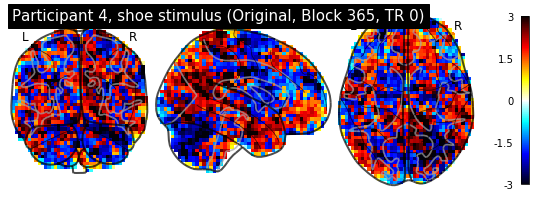

01/25/2020 00:34:22 Reconstruction Error (Frobenius Norm): 6.29037476e+02 out of 5.86593933e+02


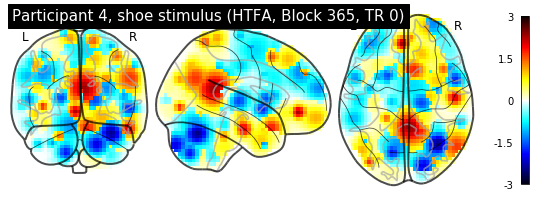

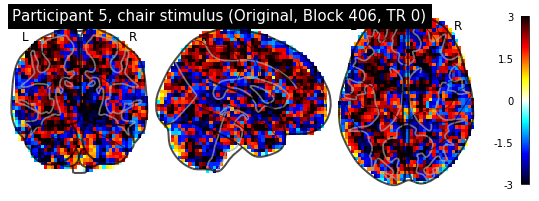

01/25/2020 00:34:24 Reconstruction Error (Frobenius Norm): 6.33971375e+02 out of 6.26754211e+02


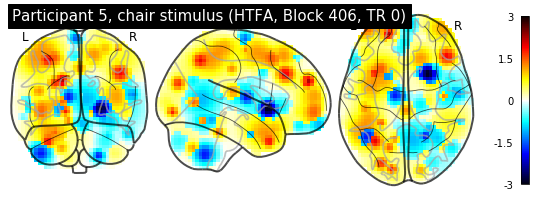

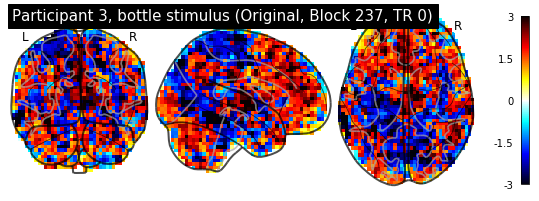

01/25/2020 00:34:26 Reconstruction Error (Frobenius Norm): 5.13746399e+02 out of 4.80455444e+02


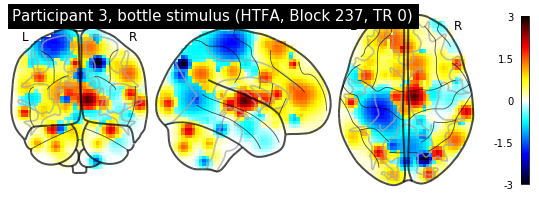

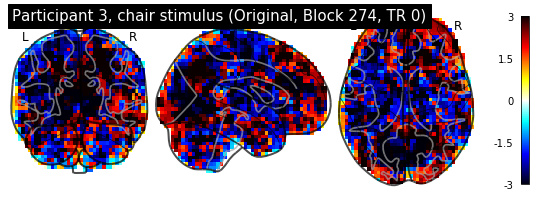

01/25/2020 00:34:28 Reconstruction Error (Frobenius Norm): 5.96430115e+02 out of 6.08611816e+02


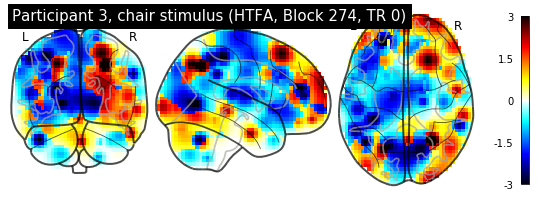

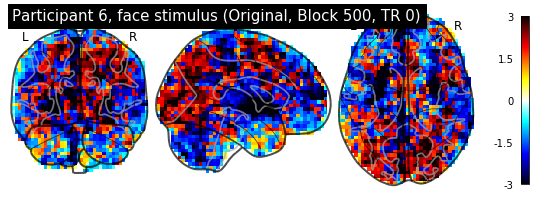

01/25/2020 00:34:30 Reconstruction Error (Frobenius Norm): 5.95963623e+02 out of 5.91160950e+02


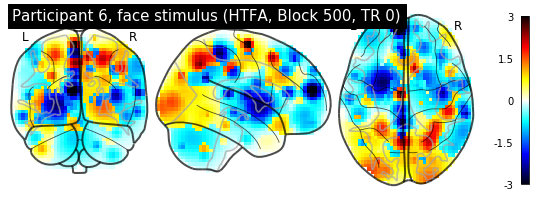

In [13]:
for b in np.random.choice(range(htfa.num_blocks), 5):
    htfa.plot_original_brain(b, labeler=subject_task_labeler)
    htfa.plot_reconstruction(b, labeler=subject_task_labeler)

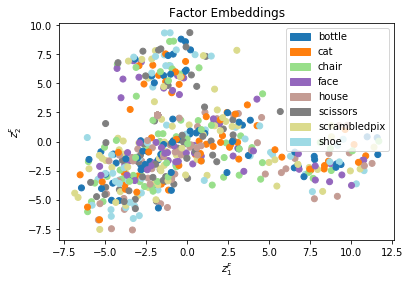

In [14]:
#factor 'embeddings' with PCA
htfa.scatter_factor_embedding(labeler=lambda block: task_labeler(block.task), embedding='PCA')

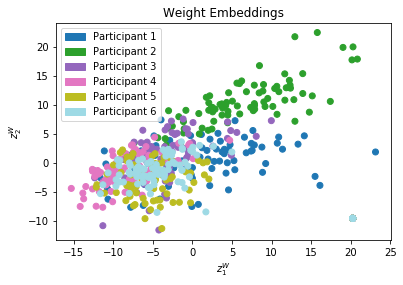

In [15]:
#weight 'embeddings' with PCA
htfa.scatter_weight_embedding(labeler=lambda block: subject_labeler(block.subject), embedding='PCA')

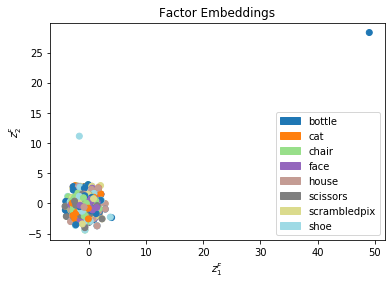

In [16]:
#factor 'embeddings' with TSNE
htfa.scatter_factor_embedding(labeler=lambda block: task_labeler(block.task), embedding='TSNE')

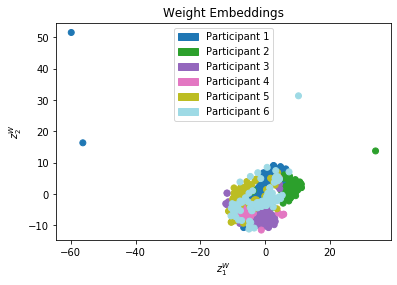

In [17]:
#weight 'embeddings' with TSNE
htfa.scatter_weight_embedding(labeler=lambda block: subject_labeler(block.subject), embedding='TSNE')

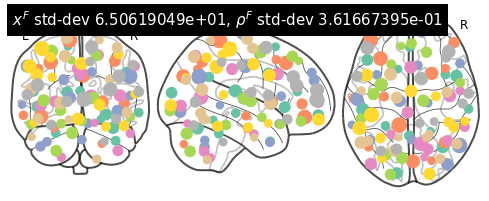

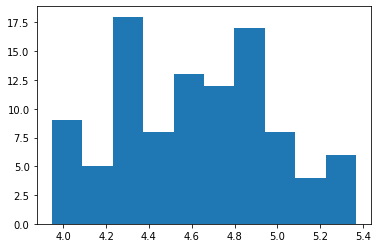

(<nilearn.plotting.displays.OrthoProjector at 0x7f11c825be90>,
 tensor([[-49.8757, -25.9419,  16.0426],
         [ 34.5261, -65.7031, -23.5208],
         [ 48.9103,   9.0865,  34.0105],
         [ 27.2166,  61.3663,  -9.4704],
         [ -0.7541, -53.7016,  30.6818],
         [-44.8938,  26.0249,  -0.9961],
         [-25.7831, -43.3391, -28.9742],
         [-12.8244,  16.3538,  62.4122],
         [ 61.6523, -25.4889,  -7.3675],
         [ 21.6383, -49.1663, -14.4874],
         [ -0.0990,  39.3134,  15.3650],
         [-13.7216, -93.0007,  14.1200],
         [ 37.2548,  10.6577, -37.0721],
         [-27.2229, -12.5896, -22.9407],
         [ 36.5407, -60.7504,  46.8707],
         [-43.5622, -65.3715,  38.6747],
         [ 46.4455,  44.2159,   2.3389],
         [ 23.0092,  11.8778,   3.8367],
         [ 22.7723, -80.0824, -40.0646],
         [-41.2667,  47.0643, -11.5092],
         [-59.6981, -14.7553, -10.2192],
         [ 37.3006,  16.9614,  48.8820],
         [-11.4025, -42.5985,  69.1

In [18]:
htfa.visualize_factor_template()

In [19]:
htfa.average_reconstruction_error(weighted=False, blocks_filter=haxby_db.inference_filter(training=True))

01/25/2020 00:34:48 Average reconstruction error (MSE): 5.03311798e+02 +/- 3.63876748e+01
01/25/2020 00:34:48 Average data norm (Euclidean): 6.03396826e+02 +/- 6.17218758e+01
01/25/2020 00:34:48 Percent average reconstruction error: 83.713347 +/- 3.73130097e+00


(array([542.17443848, 525.56091309, 494.35931396, 501.65377808,
        513.74676514, 502.93463135, 508.02038574, 480.95074463,
        545.25305176, 521.86114502, 495.54782104, 450.01004028,
        467.33416748, 482.64624023, 545.18536377, 533.95892334,
        496.68185425, 489.86065674, 471.25091553, 499.02209473,
        481.40136719, 524.92614746, 493.3977356 , 500.07034302,
        601.40673828, 542.97515869, 497.62536621, 526.4855957 ,
        471.23791504, 506.13967896, 510.19039917, 474.55657959,
        567.86602783, 517.94543457, 467.41229248, 488.41027832,
        521.3081665 , 484.7578125 , 505.65045166, 531.20465088,
        580.16900635, 496.99969482, 499.44363403, 518.76489258,
        519.99578857, 508.94671631, 541.67193604, 485.81503296,
        519.58300781, 532.96466064, 484.47769165, 456.29367065,
        502.06677246, 540.52642822, 510.41955566, 539.01416016,
        454.38818359, 448.85369873, 466.44598389, 447.57989502,
        464.10223389, 473.10131836, 430.